In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

court_data = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')

court_df = pd.DataFrame(court_data)
court_df.head()

,Gender,Year,charge,court_d,prep_h
0,Male,2015,Attempt Murder,60.0,430.0
1,Male,2014,Attempt Murder,60.0,450.0
2,Male,2020,Attempt Murder,55.0,350.0
3,Female,2013,Attempt Murder,55.0,440.0
4,Male,2013,Attempt Murder,50.0,375.0


In [8]:
#Converting Year as a year value and not a numerical value
court_df['Year'] = pd.to_datetime(court_df['Year'])

In [9]:
#Sum of Prep Hours and Court Days
court_df.groupby("Gender").sum()

,court_d,prep_h
Gender,,
Female,22824.0,318395.70
Male,24193.0,331973.63
Unisex,1924.5,26770.37
Unknown,528.0,8207.35


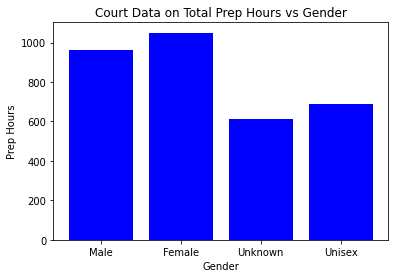

In [17]:
X = list(court_df.iloc[:, 0])
Y = list(court_df.iloc[:, 4])

# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.title("Court Data on Total Prep Hours vs Gender")
plt.xlabel("Gender")
plt.ylabel("Prep Hours")

# Show the plot
plt.show()

In [18]:
#Summary Stats By Gender vs Charge
court_df.groupby(["Gender", "charge"]).describe()

court_d                        ...  prep_h                 
                         count       mean        std  ...     50%      75%     max
Gender  charge                                        ...                         
Female  Attempt Murder    61.0  16.081967  15.619747  ...  250.00  350.000   950.0
        Murder           258.0  26.821705  16.539517  ...  450.00  531.755  1050.0
        Narcotics         86.0  23.453488  17.242667  ...  325.00  418.750   525.0
        Other            156.0  24.615385  16.104682  ...  327.00  375.750   487.0
        Robbery          149.0  28.671141  19.263620  ...  325.00  376.000   965.0
        Sexual Assault   103.0  25.417476  14.234399  ...  299.00  341.375   401.0
        Weapons           97.0  22.432990  11.040557  ...  320.00  340.000   780.0
Male    Attempt Murder    75.0  16.266667  15.096387  ...  256.00  325.000   760.0
        Murder           251.0  27.370518  17.218890  ...  450.00  550.000   865.0
        Narcotics        111.0  25.090090  14.882295  ...  350.00  407.500   800.0
        Other            182.0  27.318681  17.097949  ...  350.00  402.250   516.0
        Robbery          129.0  30.263566  17.783647  ...  343.00  395.000   463.0
        Sexual Assault   101.0  25.415842  14.432094  ...  301.00  350.000   960.0
        Weapons           86.0  21.802326  11.211150  ...  320.00  338.500   390.0
Unisex  Attempt Murder     3.0  15.333333   6.506407  ...  370.00  380.000   390.0
        Murder            17.0  24.852941  16.259386  ...  450.00  550.000   690.0
        Narcotics         10.0  27.800000  18.925585  ...  392.50  430.000   500.0
        Other             23.0  30.521739  17.933893  ...  350.00  447.000   485.0
        Robbery           10.0  27.300000  18.300273  ...  313.00  343.750   420.0
        Sexual Assault     9.0  16.222222  10.603982  ...  250.00  300.000   388.0
        Weapons            3.0  19.000000   6.244998  ...  255.00  287.500   320.0
Unknown Attempt Murder     1.0  25.000000        NaN  ...  250.00  250.000   250.0
        Murder             3.0  27.000000  11.532563  ...  500.00  500.000   500.0
        Narcotics          3.0  22.000000  25.238859  ...  277.35  443.675   610.0
        Other              8.0  25.250000  20.026768  ...  334.00  429.000   502.0
        Robbery            2.0   6.000000   5.656854  ...  210.00  227.500   245.0
        Sexual Assault     4.0   9.000000   3.162278  ...  204.00  238.000   328.0
        Weapons            4.0  26.500000  11.818065  ...  330.00  348.250   373.0

[28 rows x 16 columns]

In [31]:
#Charge vs Gender in Prep Hour Averages
gender_courtprep = court_df.pivot_table(index=["Gender"], 
               columns=["charge"], 
               values=["prep_h"], 
               aggfunc=[np.mean])

gender_courtprep['Average']= gender_courtprep.mean(axis=1)
gender_courtprep

mean              ...                 Average
                prep_h              ...                        
charge  Attempt Murder      Murder  ...     Weapons            
Gender                              ...                        
Female      292.688525  444.065930  ...  308.427835  329.446904
Male        286.100000  441.997968  ...  298.533721  335.865082
Unisex      336.666667  433.529412  ...  276.666667  336.849031
Unknown     250.000000  466.666667  ...  322.250000  315.558333

[4 rows x 8 columns]

In [32]:
#Court Days
gender_courtdays = court_df.pivot_table(index=["Gender"], 
               columns=["charge"], 
               values=["court_d"], 
               aggfunc=[np.mean])

gender_courtdays['Average']= gender_courtdays.mean(axis=1)
gender_courtdays

mean             ...               Average
               court_d             ...                      
charge  Attempt Murder     Murder  ...    Weapons           
Gender                             ...                      
Female       16.081967  26.821705  ...  22.432990  23.927736
Male         16.266667  27.370518  ...  21.802326  24.789670
Unisex       15.333333  24.852941  ...  19.000000  23.004319
Unknown      25.000000  27.000000  ...  26.500000  20.107143

[4 rows x 8 columns]

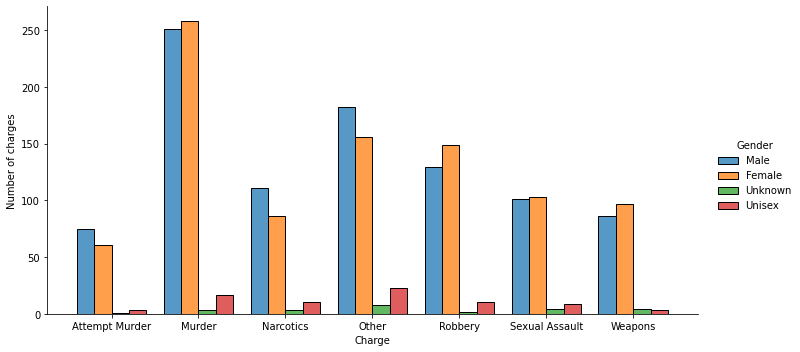

In [33]:
gender_bar_graph = sns.displot(data=court_df, x='charge', hue='Gender', multiple='dodge', shrink=.8, height=5, aspect=2)
gender_bar_graph.set(xlabel='Charge', ylabel='Number of charges')